In [1]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt
import os
import errno
import time
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams.update({'font.size': 26})

## Change the directory to where the data is

### Check in which directory you are right now

In [2]:
os.getcwd()

'/home/nahum/Dropbox/CBPF/Python/Codigos/Cluster_Finder/Finite_Scalling'

### In my case my data is on .../Python/Cluster_Finder/data

In [3]:
os.chdir('/home/nahum/Dropbox/CBPF/Python/Codigos/Cluster_Finder/data') 
list_N = os.listdir('.')
N = [int(i) for i in list_N]
N.sort()


In [4]:
os.chdir(str(N[1]))

In [5]:
list_files = os.listdir('.')
list_files.sort()
#list_files

In [6]:
x2 = list_files[int(len(list_files)/2):]
p_inf = list_files[:int(len(list_files)/2)]
data = zip(p_inf,x2)

### Unpacking data

In [7]:
x2_data = [np.loadtxt(x2[i], unpack=True) for i in range(len(x2))]
p_inf_data = [np.loadtxt(p_inf[i], unpack=True) for i in range(len(p_inf))]

### Labeling data axis

In [8]:
x2_data_x = [x2_data[i][0] for i in range(len(x2_data))]
x2_data_y = [x2_data[i][1] for i in range(len(x2_data))]
p_inf_data_x = [p_inf_data[i][0] for i in range(len(p_inf_data))]
p_inf_data_y = [p_inf_data[i][1] for i in range(len(p_inf_data))]

### Taking Mean of the data

In [9]:
#Probability
p = p_inf_data_x[0]

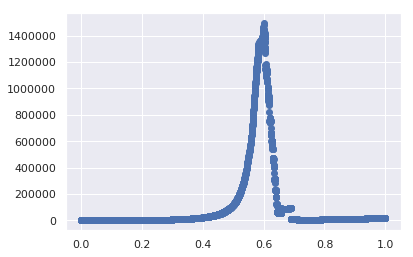

In [10]:
x22 = []
x22_r = []
for i in range(len(x2_data_y[0])): #samples
    x22_r = []
    for j in range(len(x2_data_y)): #files
        x22_r.append(x2_data_y[j][i])
    x22.append(np.mean(x22_r))
plt.plot(p, x22, 'o')
plt.show()

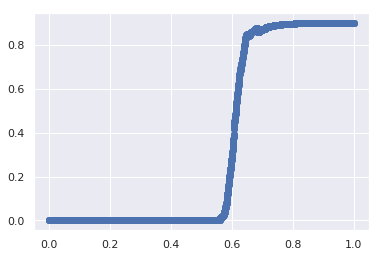

In [11]:
piinf = []
piinf_r = []
for i in range(len(p_inf_data_y[0])): #samples
    piinf_r = []
    for j in range(len(p_inf_data_y)): #files
        piinf_r.append(p_inf_data_y[j][i])
    piinf.append(np.mean(piinf_r))
plt.plot(p, piinf, 'o')
plt.show()

In [12]:
piinf = np.array(piinf)

In [13]:
from scipy.stats import binom

def BinomialMatrix(N,p):
    """
    Create binomial coefficients.
    """
    BM = [binom.pmf(k,N,p) for k in range(N+1)]
    return BM

def CanonicalOP(var,p):
    """
    Convert a variable to the canonical ensemble.
    """
    N = np.size(p)
    COP = sum(var*BinomialMatrix(N-1,p))
    return COP



In [ ]:
x22 = np.array(x22)

/home/nahum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/nahum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


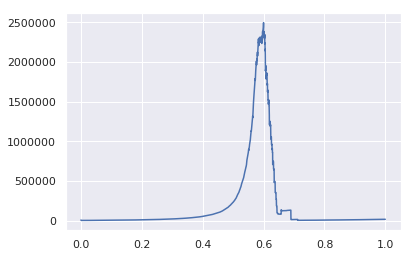

In [ ]:
plt.plot(p, CanonicalOP(x22/p,p))

## After the explanation we define a subroutine for unpacking data and changing to the canonical ensemble

In [2]:
from scipy.stats import binom

def BinomialMatrix(N,p):
    """
    Create binomial coefficients.
    """
    BM = [binom.pmf(k,N,p) for k in range(N+1)]
    return BM

def CanonicalOP(var,p):
    """
    Convert a variable to the canonical ensemble.
    """
    N = np.size(p)
    COP = sum(var*BinomialMatrix(N-1,p))
    return COP

def mea(N):
    """
    Return p, p_inf, x2 and std for a given N in the canonical ensemble.
    """
    os.chdir(str(N)) #Entering the folder
    list_files = os.listdir('.')
    list_files.sort()
    
    x2 = list_files[int(len(list_files)/2):]
    p_inf = list_files[:int(len(list_files)/2)]
    data = zip(p_inf,x2)
    x2_data = [np.loadtxt(x2[i], unpack=True) for i in range(len(x2))]
    p_inf_data = [np.loadtxt(p_inf[i], unpack=True) for i in range(len(p_inf))]
    x2_data_x = [x2_data[i][0] for i in range(len(x2_data))]
    x2_data_y = [x2_data[i][1] for i in range(len(x2_data))]
    p_inf_data_x = [p_inf_data[i][0] for i in range(len(p_inf_data))]
    p_inf_data_y = [p_inf_data[i][1] for i in range(len(p_inf_data))]
    p = p_inf_data_x[0] #Probability
    x22 = []
    x22_r = []
    for i in range(len(x2_data_y[0])): #samples
        x22_r = []
        for j in range(len(x2_data_y)): #files
            x22_r.append(x2_data_y[j][i])
        x22.append(np.mean(x22_r)/(np.max([i,1.0])))
    
    piinf = []
    piinf_r = []
    for i in range(len(p_inf_data_y[0])): #samples
        piinf_r = []
        for j in range(len(p_inf_data_y)): #files
            piinf_r.append(p_inf_data_y[j][i])
        piinf.append(np.mean(piinf_r))
    #Transform everything to np.arrays
    p = np.array(p)
    piinf = np.array(piinf)
    x22 = np.array(x22)
    
    #Change to canonical
    piinf_c = CanonicalOP(piinf,p)
    x22_c = CanonicalOP(x22,p)
    
    os.chdir('..') #Leaving the folder
    return p,piinf_c, x22_c, np.sqrt(len(x2))
    

# Getting data for Finite Size Scalling

In [3]:
os.chdir('/home/nahum/Dropbox/CBPF/Python/Codigos/Cluster_Finder/data') 
list_N = os.listdir('.')
N = [int(i) for i in list_N]
N.sort()
N = np.array(N)

In [4]:
prob = []
P_inf_data = []
x2_data = []
o_N = []
for i in N:
    a,b,c,d = mea(i)
    prob.append(a)
    P_inf_data.append(b)
    x2_data.append(c)
    o_N.append(d)
    print(i)

50
70
100
120


## Plotting data

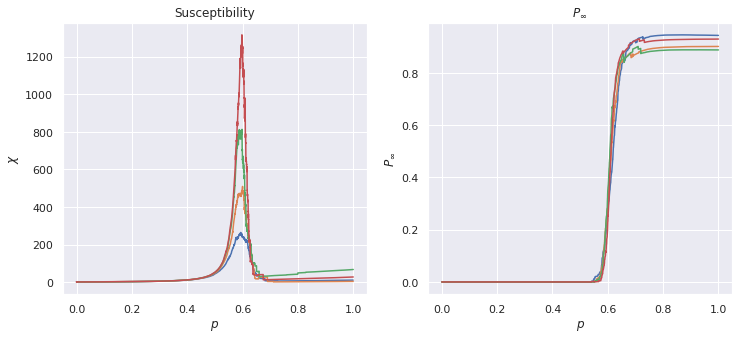

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
for i in range(len(x2_data)):
    sns.lineplot(prob[i], x2_data[i], ax= ax[0])
ax[0].set_title('Susceptibility')
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$\chi$')

for i in range(len(P_inf_data)):
    sns.lineplot(prob[i], P_inf_data[i], ax = ax[1])
ax[1].set_title(r'$P_{\infty}$')
ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$P_{\infty}$')
plt.show()

## Making a log plot of peaks in order to find the first critical exponent

In [6]:
peaks_ind = [np.argmax(x2_data[i]) for i in range(len(x2_data))]
peaks_prob = [prob[i][val] for i,val in enumerate(peaks_ind)]
peaks = [x2_data[i][val] for i,val in enumerate(peaks_ind)]
o_peaks = [1./o_N[i] for i in range(len(peaks))]

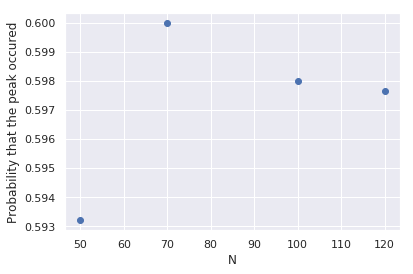

In [7]:
plt.errorbar(N,peaks_prob, linestyle= 'None', marker='o')
plt.xlabel('N')
plt.ylabel('Probability that the peak occured')
plt.show()

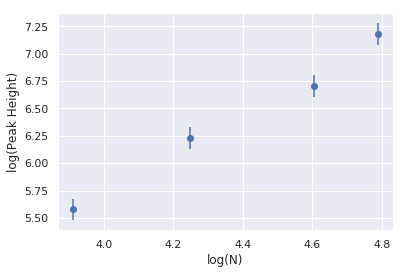

In [8]:
plt.errorbar(np.log(N),np.log(peaks), linestyle= 'None', marker='o', yerr= o_peaks)
plt.xlabel('log(N)')
plt.ylabel('log(Peak Height)')
plt.show()

## Finding critical probability

### Fit a line on N x Log(Peak)

In [9]:
from scipy.optimize import curve_fit
def f(x,a,b):
    return a*x + b
popt, pcov = curve_fit(f, np.log(N), np.log(peaks), sigma=o_peaks)
perr = np.sqrt(np.diag(pcov)) #std of fit

### Plot line

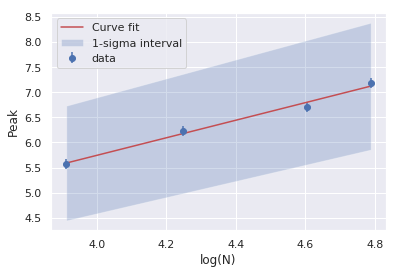

In [10]:
N_log = np.log(N)
popt_up = popt + 1 * perr
popt_dw = popt - 1 * perr
fit = f(N_log, *popt)
fit_up = f(N_log, *popt_up)
fit_dw = f(N_log, *popt_dw)


plt.errorbar(N_log,np.log(peaks), linestyle= 'None', marker='o', yerr= o_peaks, label= 'data')
plt.plot(N_log, f(N_log,*popt), 'r-', label= 'Curve fit')
plt.fill_between(N_log, fit_up, fit_dw, alpha=.25, label='1-sigma interval')
plt.legend(loc= 'upper left')
plt.xlabel('log(N)')
plt.ylabel('Peak')
plt.show()

In [11]:
v = popt[0]
v_err = perr[0]

In [12]:
print("Critical exponent:",v)
print("Error:",v_err)

Critical exponent: 1.751565573667657
Error: 0.137617812264647


### Critical exponent is  1.8 +/- 0.1

# Percolating probability

In [13]:
popt2, pcov2 = curve_fit(f, N, peaks_prob)
perr2 = np.sqrt(np.diag(pcov)) #std of fit

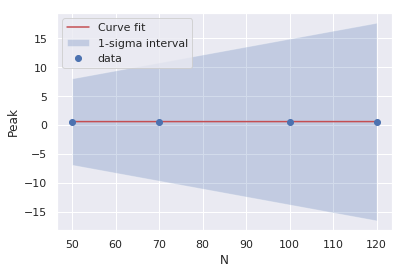

In [14]:
N = np.array(N)
popt_up2 = popt2 + 1 * perr2
popt_dw2 = popt2 - 1 * perr2
fit2 = f(N, *popt2)
fit_up2 = f(N, *popt_up2)
fit_dw2 = f(N, *popt_dw2)


plt.errorbar(N,peaks_prob, linestyle= 'None', marker='o', label= 'data')
plt.plot(N, f(N,*popt2), 'r-', label= 'Curve fit')
plt.fill_between(N, fit_up2, fit_dw2, alpha=.25, label='1-sigma interval')
plt.legend(loc= 'upper left')
plt.xlabel('N')
plt.ylabel('Peak')
plt.show()

In [15]:
p_c = popt2[1]
p_c_err = perr2[0]

In [16]:
print("Percolating Probability:",p_c)
print("Error:",p_c_err)

Percolating Probability: 0.5935353448267526
Error: 0.137617812264647


### Percolating probability = 0.603 +/- 0.0022

## Rescale with (p-pc)/pc and the Critical exponent

In [17]:
N_exp = (N**(-popt[0]))
p_new = (prob-p_c)/p_c

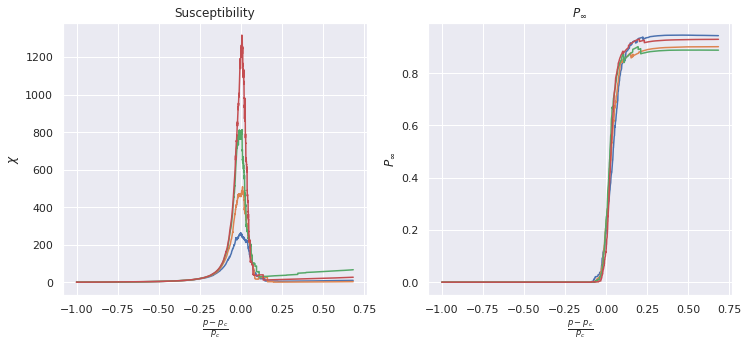

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
for i in range(len(x2_data)):
    sns.lineplot(p_new[i], x2_data[i], ax= ax[0])
ax[0].set_title('Susceptibility')
ax[0].set_xlabel(r'$\frac{p - p_c}{p_c}$')
ax[0].set_ylabel(r'$\chi$')

for i in range(len(P_inf_data)):
    sns.lineplot(p_new[i], P_inf_data[i], ax = ax[1])
ax[1].set_title(r'$P_{\infty}$')
ax[1].set_xlabel(r'$\frac{p - p_c}{p_c}$')
ax[1].set_ylabel(r'$P_{\infty}$')
plt.show()

In [19]:
x22_N = []
x22_r = []
for j in range(len(x2_data)):
    x22_r = []
    for i in range(len(x2_data[j])): 
        x22_r.append(N_exp[j]*x2_data[j][i])
    x22_N.append(x22_r)

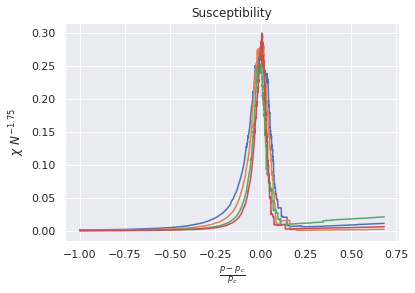

In [30]:
for i in range(len(x22_N)):
    sns.lineplot(p_new[i], x22_N[i])
plt.title('Susceptibility')
plt.xlabel(r'$\frac{p - p_c}{p_c}$')
plt.ylabel(r'$\chi \ N^{-%.2f}$'%v)
plt.show()

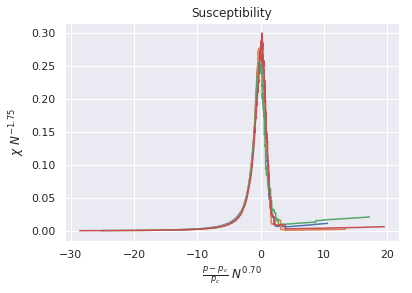

In [39]:
v_ = .7
N_exp_x = (N**(v_))
for i in range(len(x22_N)):
    sns.lineplot(p_new[i]*N_exp_x[i], x22_N[i])
plt.title('Susceptibility')
plt.xlabel(r'$\frac{p - p_c}{p_c} \ N^{%.2f}$'%v_)
plt.ylabel(r'$\chi \ N^{-%.2f}$'%v)
plt.show()

$\frac{1}{\nu}$ = 0.7

In [21]:
P_inf_N = []
P_inf_r = []
for j in range(len(P_inf_data)):
    P_inf_r = []
    for i in range(len(P_inf_data[j])): 
        P_inf_r.append(N_exp[j]*P_inf_data[j][i])
    P_inf_N.append(P_inf_r)

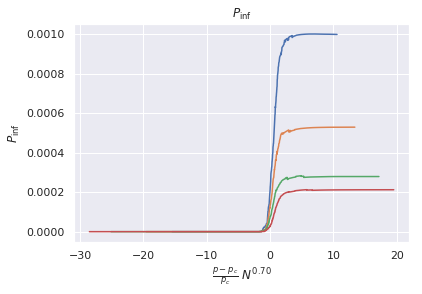

In [41]:
for i in range(len(P_inf_data)):
    sns.lineplot(p_new[i]*N_exp_x[i], P_inf_N[i])
plt.title(r'$P_{\inf}$')
plt.xlabel(r'$\frac{p - p_c}{p_c} \ N^{%.2f}$'%v_)
plt.ylabel(r'$P_{\inf}$')
plt.show()

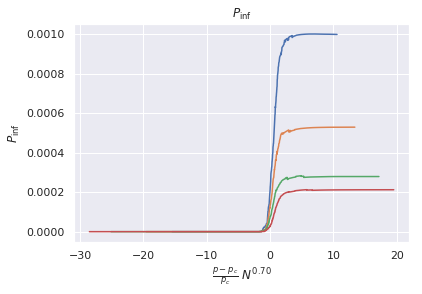

In [50]:
b = .5
N_exp_y = (N**(-b))
for i in range(len(P_inf_data)):
    sns.lineplot(p_new[i]*N_exp_x[i], P_inf_N[i])
plt.title(r'$P_{\inf}$')
plt.xlabel(r'$\frac{p - p_c}{p_c} \ N^{%.2f}$'%v_)
plt.ylabel(r'$P_{\inf}$')
plt.show()